![image.png](banner.png)

### About Walmart

Walmart is an American multinational retail corporation that operates a chain of supercenters, discount departmental stores, and grocery stores from the United States. Walmart has more than 100 million customers worldwide.

### Business Problem

The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men? (Assume 50 million customers are male and 50 million are female).

### Dataset

The company collected the transactional data of customers who purchased products from the Walmart Stores during Black Friday. The dataset has the following features:

| Field Name                | Description                       |
|---------------------------|-----------------------------------|
| User_ID                   | User ID                           |
| Product_ID                | Product ID                        |
| Gender                    | Sex of User                       |
| Age                       | Age in bins                       |
| Occupation                | Occupation (Masked)               |
| City_Category             | Category of the City (A,B,C)      |
| StayInCurrentCityYears    | Number of years stay in current city |
| Marital_Status            | Marital Status                    |
| ProductCategory           | Product Category (Masked)         |
| Purchase                  | Purchase Amount                   |

#### Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

C:\Users\UGE2KOR\AppData\Local\Temp\ipykernel_27776\1246446843.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
sns.set(style="whitegrid")
palette = sns.color_palette("husl", 8)

#### Read Dataset

In [8]:
df = pd.read_csv(r'..\data\walmart_data.txt', sep=',')
df.sample(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
178,1000033,P00154642,M,46-50,3,A,1,1,8,3897
298996,1004031,P00198742,M,26-35,0,C,0,1,1,11931
257848,1003745,P00161442,F,26-35,9,C,4+,0,5,8778
429641,1000147,P00031042,M,18-25,4,B,4+,0,8,9835
58406,1003018,P00100942,M,36-45,0,B,0,0,5,6905


In [4]:
print("Shape of the data: ", df.shape)
print("The Given Dataset has {} rows and {} columns".format(df.shape[0], df.shape[1]))
print("Columns: ", df.columns)

Shape of the data:  (550068, 10)
The Given Dataset has 550068 rows and 10 columns
Columns:  Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase'],
      dtype='object')


💡 
* Shape of the data:  (550068, 10)
* The Given Dataset has 550068 rows and 10 columns
* Columns given: ['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase']

In [5]:
df.duplicated().sum()   

0

💡 

There is no duplicate record in the given dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


💡 

Except the purchase column from the given dataset are categorial data

In [7]:
for col in df.columns[:-1]:
    df[col] = df[col].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   User_ID                     550068 non-null  category
 1   Product_ID                  550068 non-null  category
 2   Gender                      550068 non-null  category
 3   Age                         550068 non-null  category
 4   Occupation                  550068 non-null  category
 5   City_Category               550068 non-null  category
 6   Stay_In_Current_City_Years  550068 non-null  category
 7   Marital_Status              550068 non-null  category
 8   Product_Category            550068 non-null  category
 9   Purchase                    550068 non-null  int64   
dtypes: category(9), int64(1)
memory usage: 10.3 MB


In [8]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

💡 

There is no missing data in the dataset

In [9]:
df.describe()

,Purchase
count,550068.000000
mean,9263.968713
std,5023.065394
min,12.000000
25%,5823.000000
50%,8047.000000
75%,12054.000000
max,23961.000000


💡 

The Data shows the purchase value ranges from 12 to 23961 

In [10]:
df.describe(include='category').T

,count,unique,top,freq
User_ID,550068,5891,1001680,1026
Product_ID,550068,3631,P00265242,1880
Gender,550068,2,M,414259
Age,550068,7,26-35,219587
Occupation,550068,21,4,72308
City_Category,550068,3,B,231173
Stay_In_Current_City_Years,550068,5,1,193821
Marital_Status,550068,2,0,324731
Product_Category,550068,20,5,150933


#### Univariant Analysis

C:\Users\UGE2KOR\AppData\Local\Temp\ipykernel_2356\998292717.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df['City_Category'], palette=palette, order=df['City_Category'].value_counts().index)
C:\Users\UGE2KOR\AppData\Local\Temp\ipykernel_2356\998292717.py:10: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.countplot(df['City_Category'], palette=palette, order=df['City_Category'].value_counts().index)


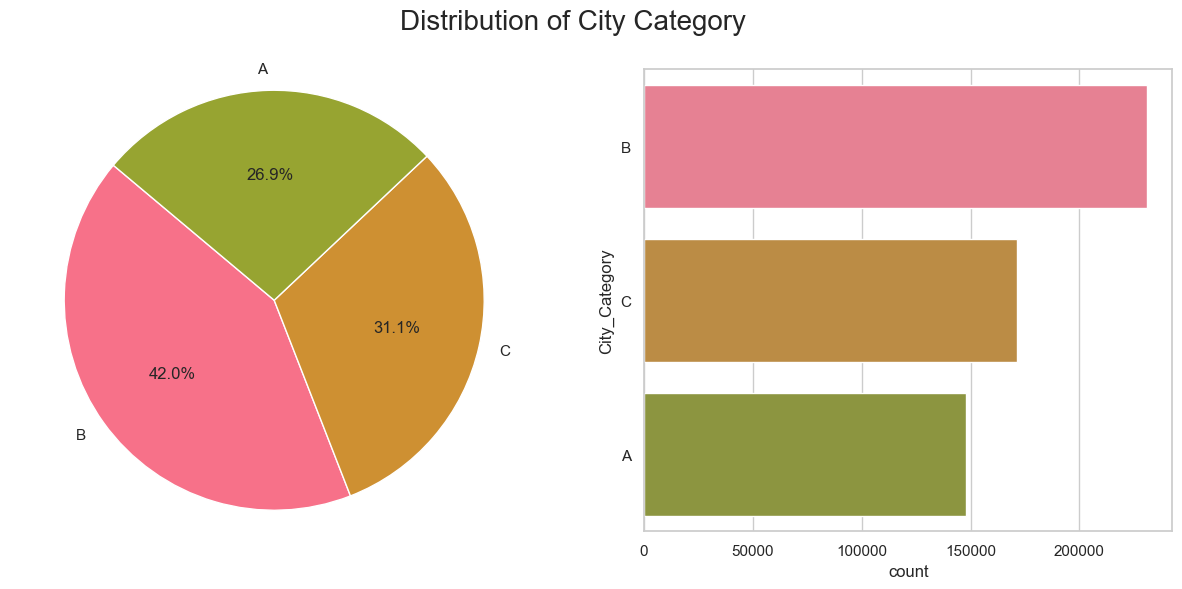

In [11]:
plt.figure(figsize=(15, 6))

plt.suptitle('Distribution of City Category', fontsize=20)

plt.subplot(1, 2, 1)
plt.pie(df['City_Category'].value_counts(), labels=df['City_Category'].value_counts().index, autopct='%1.1f%%', startangle=140, colors=palette)
plt.axis('equal')

plt.subplot(1, 2, 2)
sns.countplot(df['City_Category'], palette=palette, order=df['City_Category'].value_counts().index)
plt.show()

💡 

42% of the order comes from the B category cities, 
where as A category cities contributes 26% of the orders

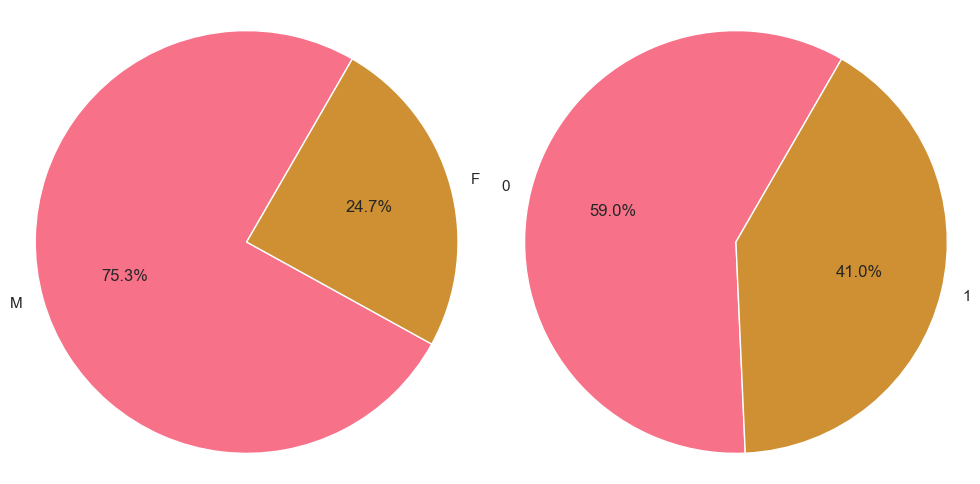

In [12]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.pie(df['Gender'].value_counts(), labels=df['Gender'].value_counts().index, autopct='%1.1f%%', startangle=60, colors=palette)
plt.axis('equal')

plt.subplot(1,2,2)
plt.pie(df['Marital_Status'].value_counts(), labels=df['Marital_Status'].value_counts().index, autopct='%1.1f%%', startangle=60, colors=palette)
plt.axis('equal')
plt.tight_layout()
plt.show()

💡 

75% of the purchase are made by the Males users
Females contributes to 25% of the purchases

59% of the purchase are made by the Singles
Where as 41% of the purchases are made by married users

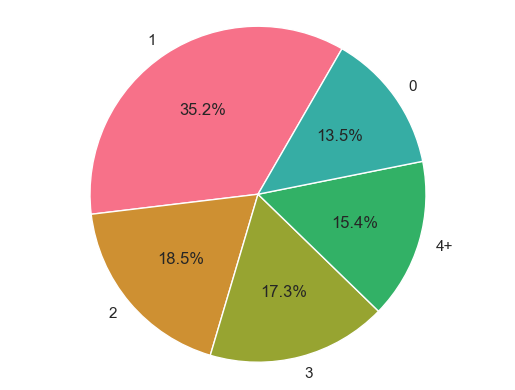

In [13]:
plt.pie(df['Stay_In_Current_City_Years'].value_counts(), labels=df['Stay_In_Current_City_Years'].value_counts().index, autopct='%1.1f%%', startangle=60, colors=palette)
plt.axis('equal')
plt.show()

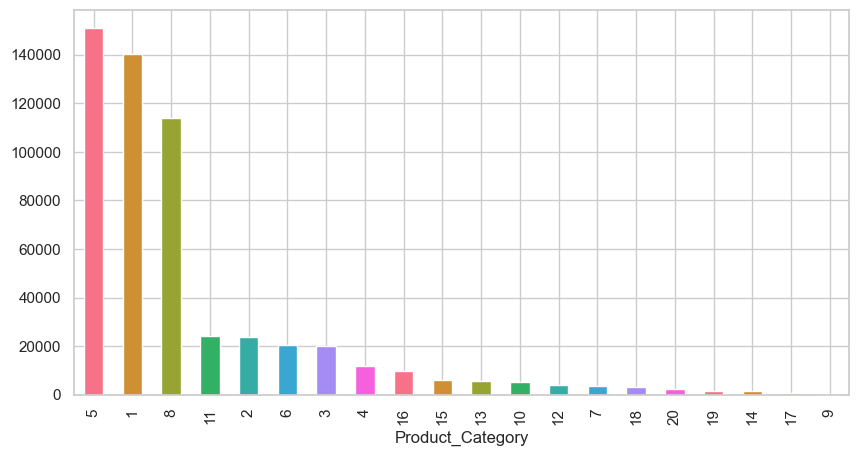

In [14]:
plt.figure(figsize=(10,5))
df['Product_Category'].value_counts().plot(kind='bar', color=palette)
plt.show()

In [15]:
df_1 = df['Product_Category'].value_counts().reset_index()
df_1['pctTotal'] = np.round((df_1['count']/df_1['count'].sum())*100,2)
df_1.sort_values(by='pctTotal', ascending=False)
df_1

,Product_Category,count,pctTotal
0,5,150933,27.44
1,1,140378,25.52
2,8,113925,20.71
3,11,24287,4.42
4,2,23864,4.34
5,6,20466,3.72
6,3,20213,3.67
7,4,11753,2.14
8,16,9828,1.79
9,15,6290,1.14


💡 

Product Category (5, 1, 8) contributes to the more than 70% of the purchase

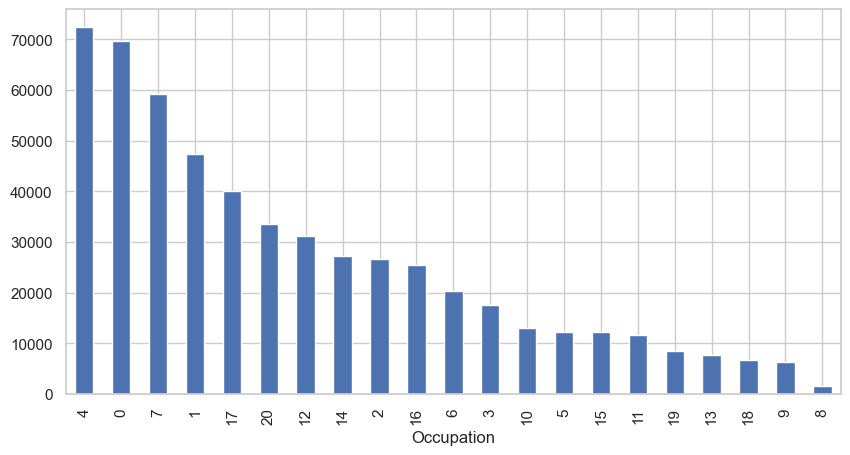

In [16]:
plt.figure(figsize=(10,5))
df['Occupation'].value_counts().plot(kind='bar')
plt.show()

In [17]:
df_1 = df['Occupation'].value_counts().reset_index()
df_1['pctTotal'] = np.round((df_1['count']/df_1['count'].sum())*100,2)
df_1.sort_values(by='pctTotal', ascending=False)
df_1

,Occupation,count,pctTotal
0,4,72308,13.15
1,0,69638,12.66
2,7,59133,10.75
3,1,47426,8.62
4,17,40043,7.28
5,20,33562,6.10
6,12,31179,5.67
7,14,27309,4.96
8,2,26588,4.83
9,16,25371,4.61


💡 

The user with the occupation (4, 0, 7) contributes to more than 35% of the purchase

C:\Users\UGE2KOR\AppData\Local\Temp\ipykernel_2356\4291304818.py:1: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.countplot(data=df, x='Age', hue='Gender', palette=palette, edgecolor='black')


<Axes: xlabel='Age', ylabel='count'>

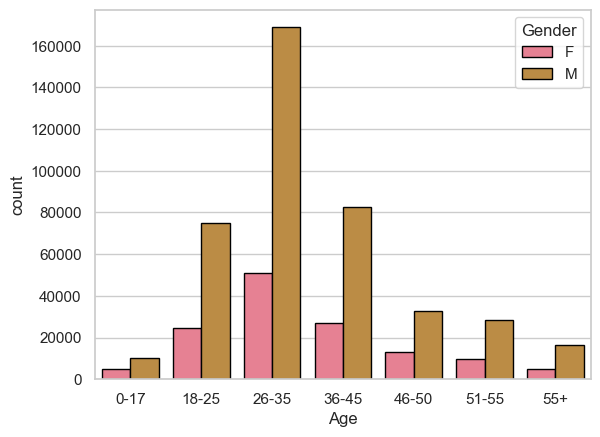

In [18]:
sns.countplot(data=df, x='Age', hue='Gender', palette=palette, edgecolor='black')

In [19]:
df_1 = df['Age'].value_counts().reset_index()
df_1['pctTotal'] = np.round((df_1['count']/df_1['count'].sum())*100,2)
df_1.sort_values(by='pctTotal', ascending=False)
df_1

,Age,count,pctTotal
0,26-35,219587,39.92
1,36-45,110013,20.00
2,18-25,99660,18.12
3,46-50,45701,8.31
4,51-55,38501,7.00
5,55+,21504,3.91
6,0-17,15102,2.75


💡 

The user within the age range of (26-35) contributes to around 40% of the purchase

C:\Users\UGE2KOR\AppData\Local\Temp\ipykernel_2356\663348945.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Age')['Purchase'].mean().plot(kind='bar', ax=ax1, color=palette)
C:\Users\UGE2KOR\AppData\Local\Temp\ipykernel_2356\663348945.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Gender')['Purchase'].mean().plot(kind='bar', ax=ax2, color=palette)
C:\Users\UGE2KOR\AppData\Local\Temp\ipykernel_2356\663348945.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior

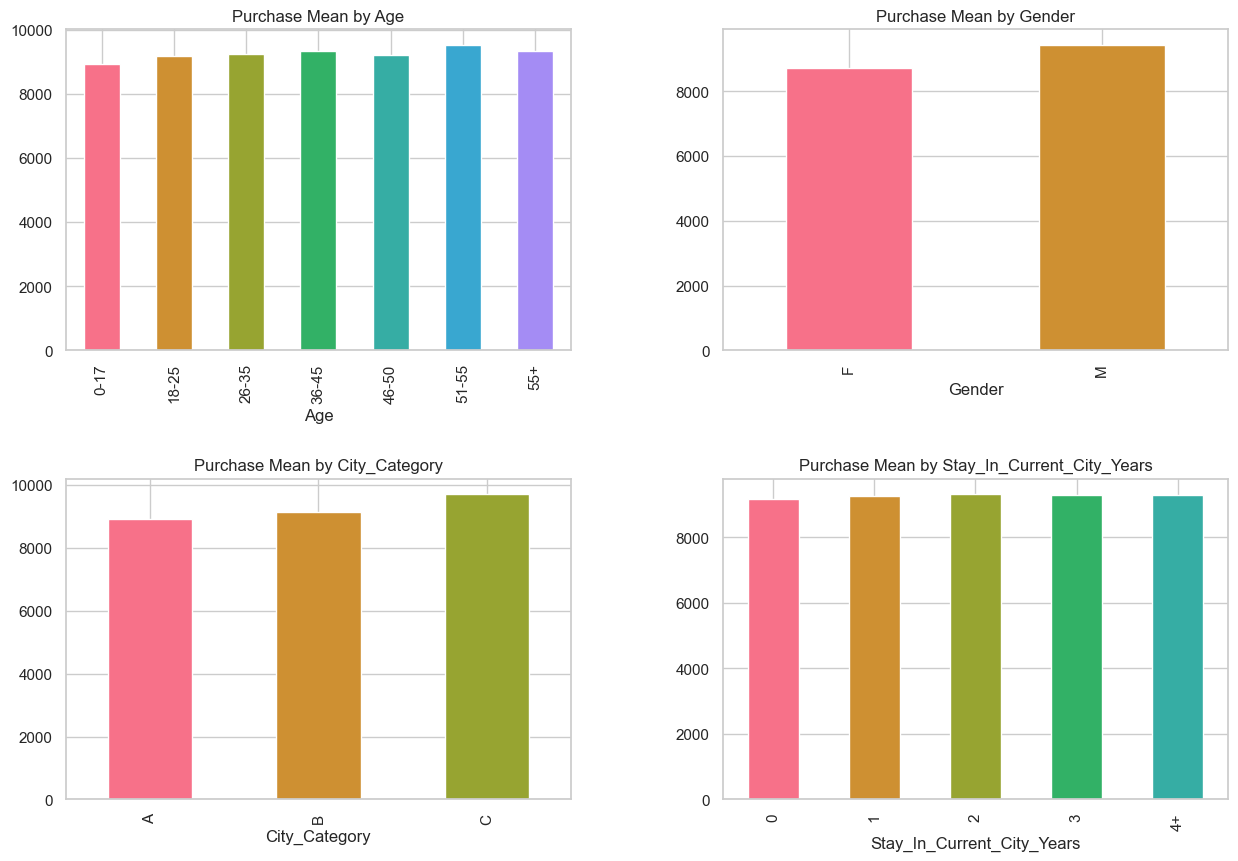

In [20]:
plt.figure(figsize=(15, 10))

# Create subplots using grid layout
grid = plt.GridSpec(2, 2, wspace=0.3, hspace=0.4)

# Plot for Purchase Mean by Age
ax1 = plt.subplot(grid[0, 0])
df.groupby('Age')['Purchase'].mean().plot(kind='bar', ax=ax1, color=palette)
plt.title('Purchase Mean by Age', fontsize=12)  # Adjust font size

# Plot for Purchase Mean by Gender
ax2 = plt.subplot(grid[0, 1])
df.groupby('Gender')['Purchase'].mean().plot(kind='bar', ax=ax2, color=palette)
plt.title('Purchase Mean by Gender', fontsize=12)

# Plot for Purchase Mean by City_Category
ax3 = plt.subplot(grid[1, 0])
df.groupby('City_Category')['Purchase'].mean().plot(kind='bar', ax=ax3, color=palette)
plt.title('Purchase Mean by City_Category', fontsize=12)

# Plot for Purchase Mean by Stay_In_Current_City_Years
ax4 = plt.subplot(grid[1, 1])
df.groupby('Stay_In_Current_City_Years')['Purchase'].mean().plot(kind='bar', ax=ax4, color=palette)
plt.title('Purchase Mean by Stay_In_Current_City_Years', fontsize=12)

plt.tight_layout()
plt.show()

C:\Users\UGE2KOR\AppData\Local\Temp\ipykernel_2356\3780700991.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['Gender','City_Category'])['Purchase'].mean().unstack().plot(kind='bar', figsize=(10,5), color=palette)


<Axes: xlabel='Gender'>

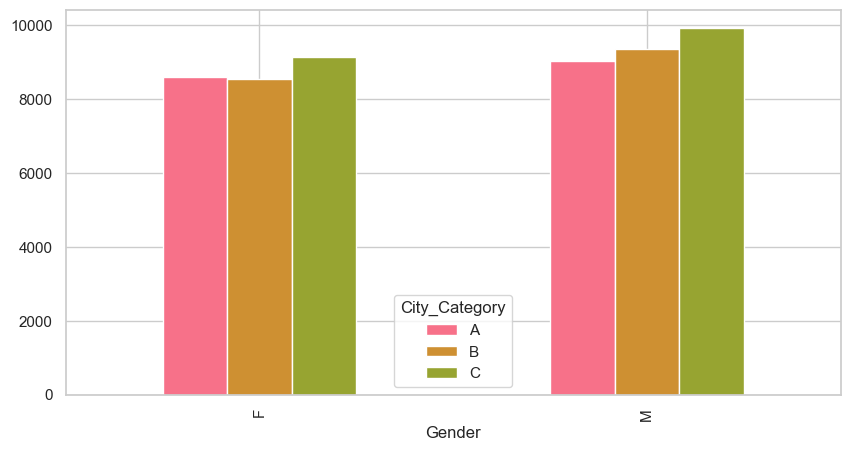

In [21]:
df.groupby(['Gender','City_Category'])['Purchase'].mean().unstack().plot(kind='bar', figsize=(10,5), color=palette)

C:\Users\UGE2KOR\AppData\Local\Temp\ipykernel_2356\4259883708.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Gender')['Purchase'].count().plot(kind='bar', ax=ax1, color=palette)
C:\Users\UGE2KOR\AppData\Local\Temp\ipykernel_2356\4259883708.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Gender')['Purchase'].sum().plot(kind='bar', ax=ax2, color=palette)


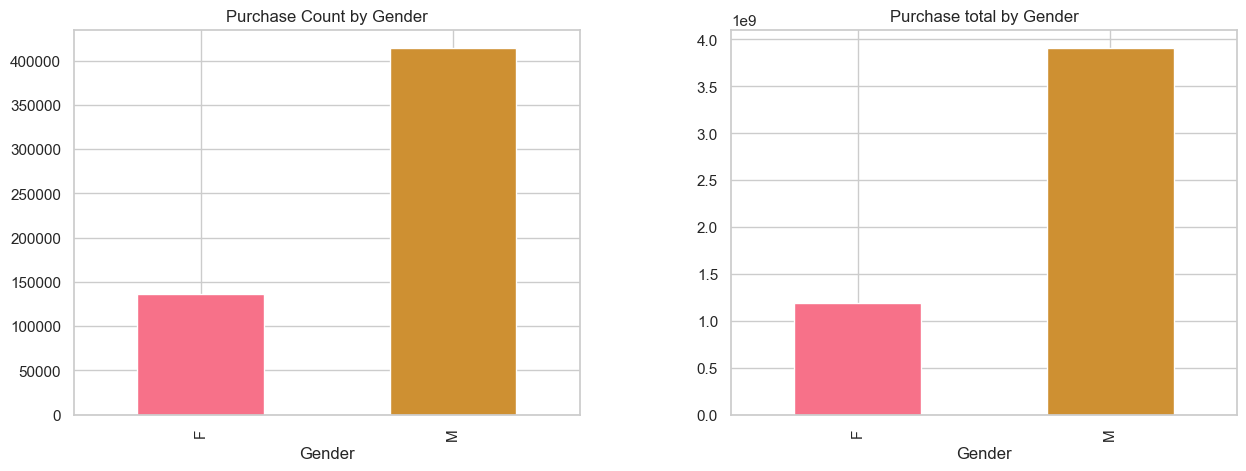

In [22]:
plt.figure(figsize=(15, 5))

# Create subplots using grid layout
grid = plt.GridSpec(1, 2, wspace=0.3, hspace=0.4)

# Plot for Purchase Mean by Age
ax1 = plt.subplot(grid[0, 0])
df.groupby('Gender')['Purchase'].count().plot(kind='bar', ax=ax1, color=palette)
plt.title('Purchase Count by Gender', fontsize=12)  # Adjust font size

# Plot for Purchase Mean by Gender
ax2 = plt.subplot(grid[0, 1])
df.groupby('Gender')['Purchase'].sum().plot(kind='bar', ax=ax2, color=palette)
plt.title('Purchase total by Gender', fontsize=12)
plt.show()

C:\Users\UGE2KOR\AppData\Local\Temp\ipykernel_2356\1176070396.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data = df.groupby(['Gender','City_Category'])['Purchase'].sum().reset_index()
C:\Users\UGE2KOR\AppData\Local\Temp\ipykernel_2356\1176070396.py:8: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.barplot(x='Gender', y='Purchase', hue='City_Category', data=data, palette=palette)


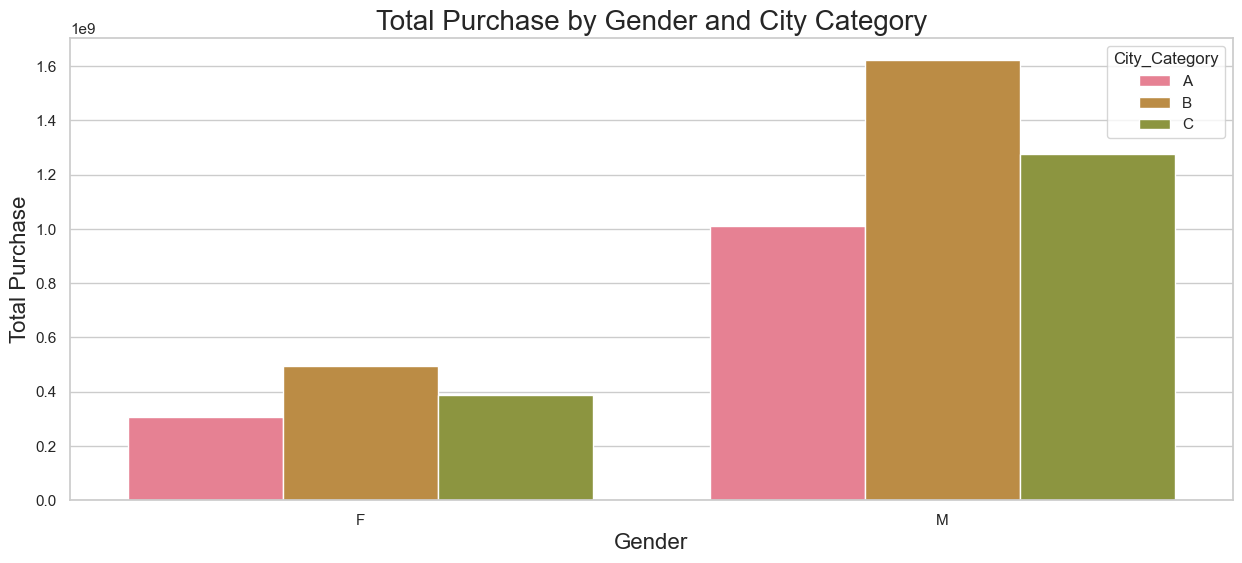

In [23]:
# Spent by gender across different cities
# Prepare data
data = df.groupby(['Gender','City_Category'])['Purchase'].sum().reset_index()

plt.figure(figsize=(15, 6))

# Create the bar plot
sns.barplot(x='Gender', y='Purchase', hue='City_Category', data=data, palette=palette)

# Add title and labels
plt.title('Total Purchase by Gender and City Category', fontsize=20)
plt.xlabel('Gender', fontsize=16)
plt.ylabel('Total Purchase', fontsize=16)

# Show the plot
plt.show()

C:\Users\UGE2KOR\AppData\Local\Temp\ipykernel_2356\1433343664.py:4: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.boxplot(data=df, x='Purchase', orient='h', hue='Gender', palette=palette, gap=0.5, showmeans=True, meanprops={"marker":"o", "markerfacecolor":"white", "markeredgecolor":"black"})


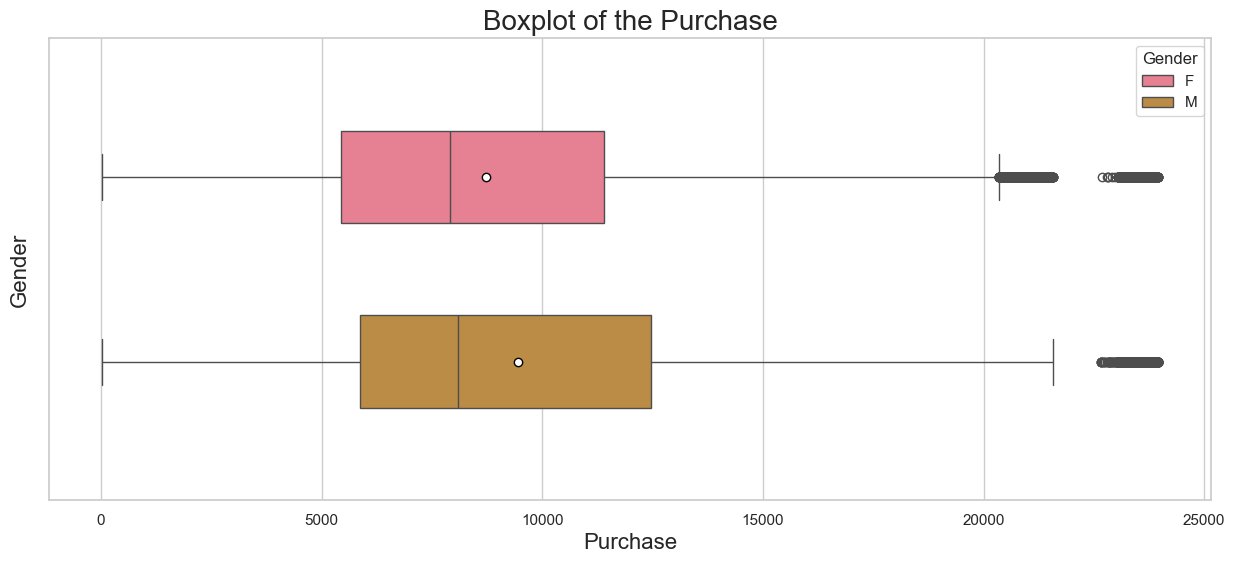

In [24]:
plt.figure(figsize=(15, 6))

# Create the boxplot
sns.boxplot(data=df, x='Purchase', orient='h', hue='Gender', palette=palette, gap=0.5, showmeans=True, meanprops={"marker":"o", "markerfacecolor":"white", "markeredgecolor":"black"})

# Add title and labels
plt.title('Boxplot of the Purchase', fontsize=20)
plt.xlabel('Purchase', fontsize=16)
plt.ylabel('Gender', fontsize=16)

# Show the plot
plt.show()

💡 

The purchase distribution by Gender shows that:

* There are outliers in the purchases by both the genders

C:\Users\UGE2KOR\AppData\Local\Temp\ipykernel_2356\1589644695.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data = df.groupby(['Product_Category','Gender'])['Purchase'].count().reset_index()
C:\Users\UGE2KOR\AppData\Local\Temp\ipykernel_2356\1589644695.py:8: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.barplot(x='Product_Category', y='Purchase', hue='Gender', data=data, palette=palette)


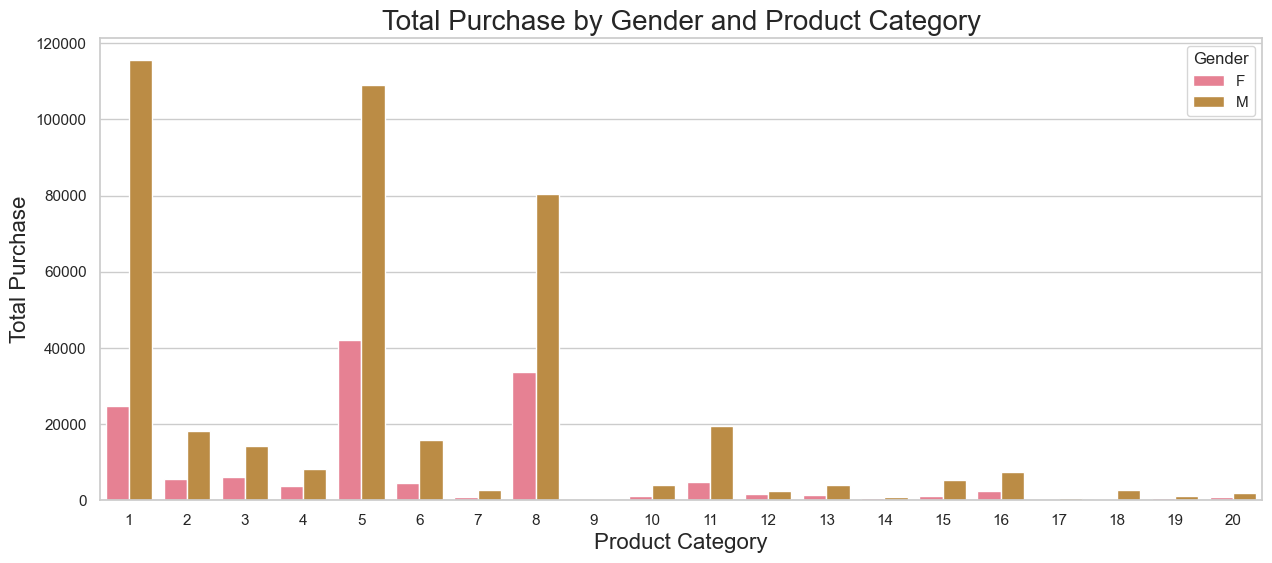

In [25]:
# Spent by gender across different Category
# Prepare data
data = df.groupby(['Product_Category','Gender'])['Purchase'].count().reset_index()

plt.figure(figsize=(15, 6))

# Create the bar plot
sns.barplot(x='Product_Category', y='Purchase', hue='Gender', data=data, palette=palette)

# Add title and labels
plt.title('Total Purchase by Gender and Product Category', fontsize=20)
plt.xlabel('Product Category', fontsize=16)
plt.ylabel('Total Purchase', fontsize=16)

# Show the plot
plt.show()

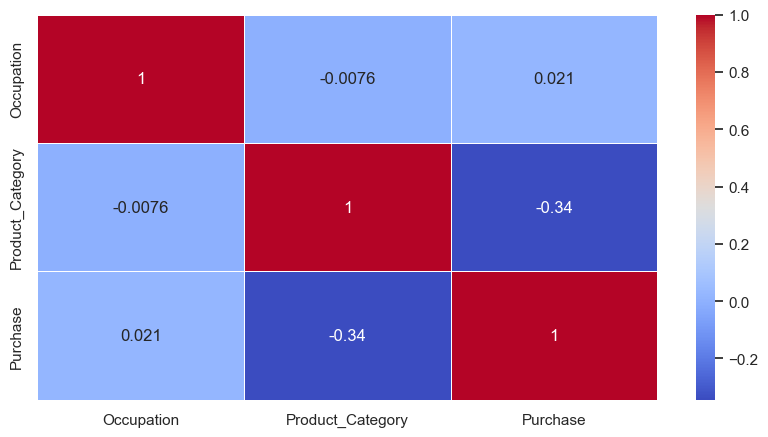

In [26]:
df_2 = df[['Occupation', 'Product_Category','Purchase']].corr()

plt.figure(figsize=(10, 5))
sns.heatmap(df_2, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

### Purchase statistical 

In [27]:
overall_mean = df['Purchase'].mean()
overall_median = df['Purchase'].median()

print("Overall Mean: ", overall_mean)
print("Overall Median: ", overall_median)
print("Difference between Mean and Median: ", overall_mean - overall_median)

Overall Mean:  9263.968712959126
Overall Median:  8047.0
Difference between Mean and Median:  1216.9687129591257


In [28]:
df.groupby('Gender')[['Purchase']].agg(['mean', 'median','sum','count']).reset_index().round(2)

C:\Users\UGE2KOR\AppData\Local\Temp\ipykernel_2356\1809377227.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Gender')[['Purchase']].agg(['mean', 'median','sum','count']).reset_index().round(2)


Gender Purchase                            
             mean  median         sum   count
0      F  8734.57  7914.0  1186232642  135809
1      M  9437.53  8098.0  3909580100  414259

💡 

The Mean purchase of Female is 8734 whereas Male mean is 9437

#### Confidence Interval

In [29]:
# calculate confidence interval
def conf_interval(data, conf=0.95):
    data = np.array(data)
    mean = np.mean(data)
    n = len(data)
    stderr = stats.sem(data)
    interval = stderr * stats.t.ppf((1 + conf) / 2., n - 1)
    return mean - interval, mean, mean + interval

# Calculate the confidence interval for the purchase
intervals = [0.90, 0.95, 0.99]

for i in intervals:
    print("Confidence Interval for the purchase at {} level is: {}".format(i, conf_interval(df['Purchase'], i)))
    print("Confidence Interval for male purchase at {} level is: {}".format(i, conf_interval(df[df['Gender']=='M']['Purchase'], i)))
    print("Confidence Interval for female purchase at {} level is: {}".format(i, conf_interval(df[df['Gender']=='F']['Purchase'], i)))
    print("\n---------------------------------------------\n")

Confidence Interval for the purchase at 0.9 level is: (9252.828624742293, 9263.968712959126, 9275.108801175958)
Confidence Interval for male purchase at 0.9 level is: (9424.512468203842, 9437.526040472265, 9450.539612740688)
Confidence Interval for female purchase at 0.9 level is: (8713.287689504074, 8734.565765155476, 8755.843840806878)

---------------------------------------------

Confidence Interval for the purchase at 0.95 level is: (9250.694472258305, 9263.968712959126, 9277.242953659947)
Confidence Interval for male purchase at 0.95 level is: (9422.019402055814, 9437.526040472265, 9453.032678888716)
Confidence Interval for female purchase at 0.95 level is: (8709.21132117373, 8734.565765155476, 8759.92020913722)

---------------------------------------------

Confidence Interval for the purchase at 0.99 level is: (9246.523381381907, 9263.968712959126, 9281.414044536345)
Confidence Interval for male purchase at 0.99 level is: (9417.14682877079, 9437.526040472265, 9457.90525217374

In [30]:
# Generate sample data for the purchase with the list fo confidence intervals
data = df['Purchase']
conf = [0.90, 0.95, 0.99]
sample_data = {i: conf_interval(data, i) for i in conf}

# Create a dataframe from the sample data
df_conf = pd.DataFrame(sample_data, index=['lower', 'mean', 'upper']).T
df_conf

,lower,mean,upper
0.90,9252.828625,9263.968713,9275.108801
0.95,9250.694472,9263.968713,9277.242954
0.99,9246.523381,9263.968713,9281.414045


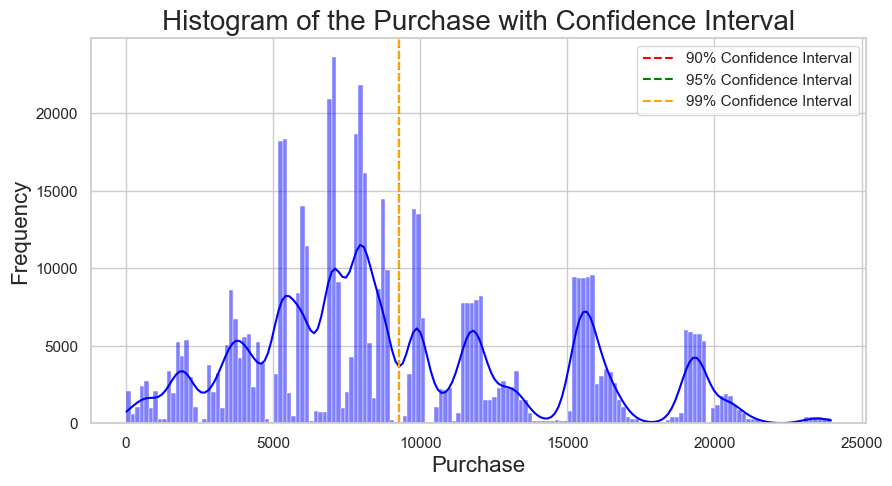

In [31]:
# histogram of the purchase with the confidence interval
plt.figure(figsize=(10, 5))
sns.histplot(df['Purchase'], kde=True, color='blue')
plt.axvline(df_conf.loc[0.90, 'mean'], color='red', linestyle='--', label='90% Confidence Interval')
plt.axvline(df_conf.loc[0.95, 'mean'], color='green', linestyle='--', label='95% Confidence Interval')
plt.axvline(df_conf.loc[0.99, 'mean'], color='orange', linestyle='--', label='99% Confidence Interval')
plt.legend()
plt.title('Histogram of the Purchase with Confidence Interval', fontsize=20)
plt.xlabel('Purchase', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.show()


### Do women spend more on Black Friday than men?

In [34]:

# Null Hypothesis: There is no difference in the mean purchase
# Alternative Hypothesis: There is a difference in the mean purchase

# Calculate
t_stat, p_value = stats.ttest_ind(df[df['Gender']=='M']['Purchase'], df[df['Gender']=='F']['Purchase'])
print("t-statistic: ", t_stat)
print("p-value: ", p_value)

# Interpret
alpha = 0.05
if p_value < alpha:
    print("We reject the null hypothesis, there is a difference in the mean purchase")
else:
    print("We fail to reject the null hypothesis, there is no difference in the mean purchase")

t-statistic:  44.837957934353966
p-value:  0.0
We reject the null hypothesis, there is a difference in the mean purchase


💡 
 There is a difference in the purchase behaviour between Males and Females

In [33]:
female_purchase = df[df['Gender'] == 'F']['Purchase']

n_female = len(female_purchase)
mean_female = female_purchase.mean()
population_std_dev = female_purchase.std()
#confidence level (95%)
confidence_level = 0.95
t_stat, p_value = stats.ttest_1samp(female_purchase, popmean=population_std_dev)
lower_bound = mean_female - (t_stat * (population_std_dev / (n_female**0.5)))
upper_bound = mean_female + (t_stat * (population_std_dev / (n_female**0.5)))
print(f"Female Sample Mean: {mean_female}")
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")
print(f"Confidence Interval: ({lower_bound}, {upper_bound})")

Female Sample Mean: 8734.565765155476
T-statistic: 306.687777270498
P-value: 0.0
Confidence Interval: (4767.233289291458, 12701.898241019493)


### Insights

1. The dataset has 537577 rows and 12 columns.
2. The dataset has no missing values.
3. The dataset has no duplicate values.
4. The dataset has 5 categorical columns and 7 numerical columns.
5. The dataset has 3 unique city categories


### Recommendations

Based on the analysis, the following recommendations can be made to the store:
1. Focus on the age group of 26-35 as they are the highest spenders.
2. Focus on the city category B as it has the highest number of customers.
3. Focus on the product category 1 as it has the highest number of customers.
4. Focus on the occupation 4 as it has the highest number of customers.
5. Focus on the married customers as they are the highest spenders.
6. Focus on the customers who have stayed in the city for 1 year as they are the highest spenders.

### Actionable Insights

1. The highest number of customers are from City_Category B, followed by City_Category C and City_Category A.
2. The number of Male customers is more than the number of Female customers. (Focus of marketing targeting females to increase sales.)
3. The number of Single customers is more than the number of Married customers. (Focus of marketing targeting married customers to increase sales.)
4. The number of customers who have stayed for 1 year in the current city is more than the number of customers who have stayed for 2 years in the current city.
5. Targeting the customers aged over 26 years will increase the sales.